In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("trainc.csv")

In [3]:
data.shape

(800000, 47)

In [4]:
data.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14
0,0,35000.0,5,19.52,917.97,E,E2,320.0,2 years,2,...,9.0,8.0,4.0,12.0,2.0,7.0,0.0,0.0,0.0,2.0
1,1,18000.0,5,18.49,461.90,D,D2,219843.0,5 years,0,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
2,2,12000.0,5,16.99,298.17,D,D3,31698.0,8 years,0,...,0.0,21.0,4.0,5.0,3.0,11.0,0.0,0.0,0.0,4.0
3,3,11000.0,3,7.26,340.96,A,A4,46854.0,10+ years,1,...,16.0,4.0,7.0,21.0,6.0,9.0,0.0,0.0,0.0,1.0
4,4,3000.0,3,12.99,101.07,C,C2,54.0,NaN,1,...,4.0,9.0,10.0,15.0,7.0,12.0,0.0,0.0,0.0,4.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

#### 违约

[]

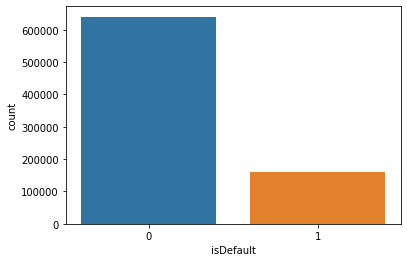

In [20]:
sns.countplot("isDefault",data=data)
plt.plot()

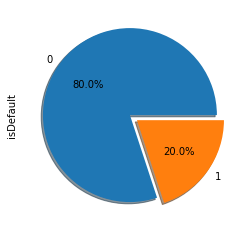

In [21]:
data["isDefault"].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [23]:
data.isDefault.value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

观点： 1. 样本不平均

## feature

#### loan amount

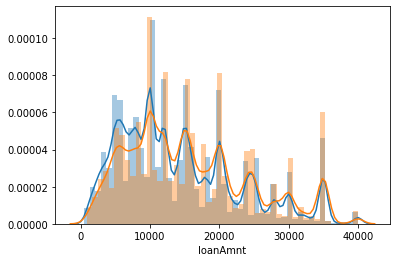

In [37]:
#f,ax = plt.subplots(1,2,figsize=(18,8))
sns.distplot(data.loc[data.isDefault==0].loanAmnt)
sns.distplot(data.loc[data.isDefault==1].loanAmnt)
plt.show()

在这个图像上面，显示1和0 ，在金额的范围来看是相似的

#### term 

In [39]:
data.term.describe()

count    800000.000000
mean          3.482745
std           0.855832
min           3.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: term, dtype: float64

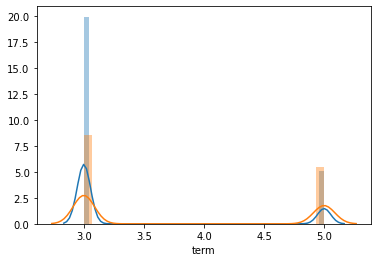

In [40]:
sns.distplot(data.loc[data.isDefault==0].term)
sns.distplot(data.loc[data.isDefault==1].term)
plt.show()

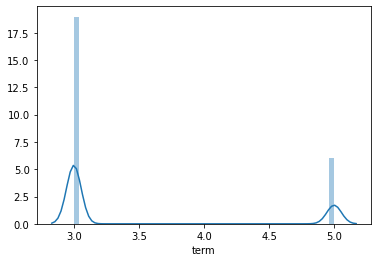

In [41]:
sns.distplot(data.term)
plt.show()

主要集中在term 3和 term 5 ，对于是否是违约没有直接关系

#### interest rate

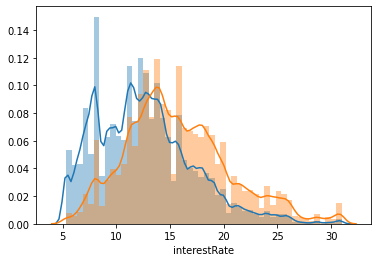

In [42]:
sns.distplot(data.loc[data.isDefault==0].interestRate)
sns.distplot(data.loc[data.isDefault==1].interestRate)
plt.show()

- 对于会违约的客户，一般定价都会高一些
- 因此违约客户在高利率的数量密度函数都会偏向高密度

#### installment

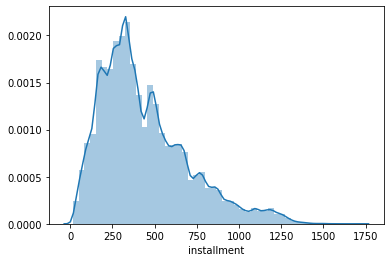

In [48]:
#这个理解就是，就是借款金额的
  ##？？这里需要确定，是一期 还是我们要和term 一起，算出总金额
sns.distplot(data.installment)
plt.show()

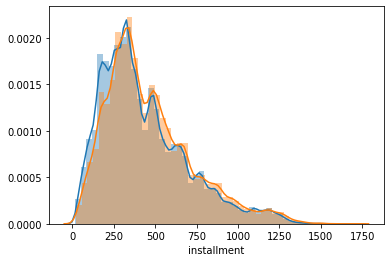

In [49]:
sns.distplot(data.loc[data.isDefault==0].installment)
sns.distplot(data.loc[data.isDefault==1].installment)
plt.show()

- 整个样本都是集中在，分期数量都是偏小
- 没有过分区分违约不违约

####  grade

In [50]:
 #认为这个东西是 五级分类
data.grade

0         E
1         D
2         D
3         A
4         C
         ..
799995    C
799996    A
799997    C
799998    A
799999    B
Name: grade, Length: 800000, dtype: object

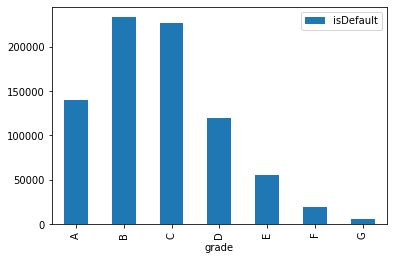

In [55]:
data[["grade","isDefault"]].groupby("grade").count().plot.bar()
plt.show()

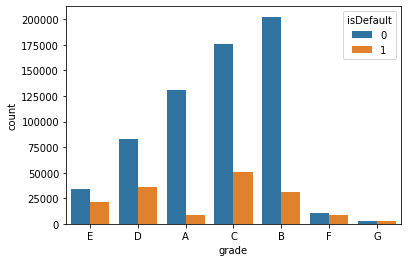

In [56]:
sns.countplot("grade",hue="isDefault",data=data)
plt.show()

- 画图countplot 的hue,画出分类的图
- groupby 分别count
- 这里为什么会有fg ,对于b类我的想法是，逾期一点这种

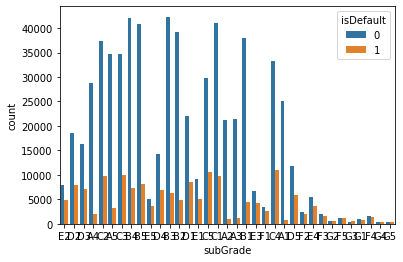

In [58]:
sns.countplot("subGrade",hue='isDefault',data=data)
plt.show()

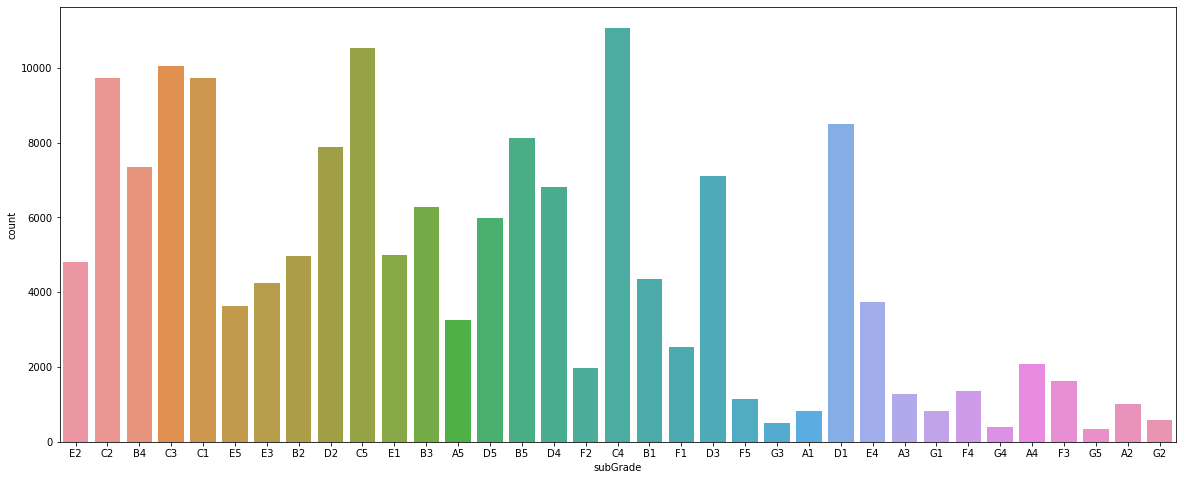

In [62]:
f,ax=plt.subplots(1,1,figsize=(20,8))
sns.countplot("subGrade",data=data.loc[data["isDefault"]==1],ax=ax)
plt.show()

#### employment 

In [66]:
data.employmentTitle.describe()

count    799999.000000
mean      72005.351714
std      106585.640204
min           0.000000
25%         427.000000
50%        7755.000000
75%      117663.500000
max      378351.000000
Name: employmentTitle, dtype: float64

#### homeOwnership

In [69]:
data.homeOwnership.describe()

count    800000.000000
mean          0.614213
std           0.675749
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: homeOwnership, dtype: float64

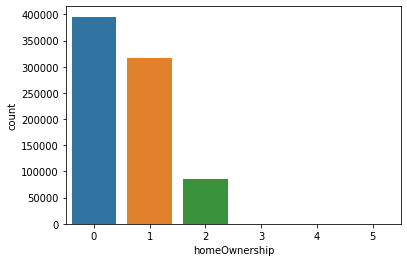

In [70]:
sns.countplot('homeOwnership',data=data)
plt.show() 

- 这里是不是要涉及到修改feature类别
- 主要的homeownership 的状态是3种

#### 年收入

In [87]:
import numpy as np
np.set_printoptions(suppress=True)

In [96]:
data.annualIncome.describe()

count    8.000000e+05
mean     7.613391e+04
std      6.894751e+04
min      0.000000e+00
25%      4.560000e+04
50%      6.500000e+04
75%      9.000000e+04
max      1.099920e+07
Name: annualIncome, dtype: float64

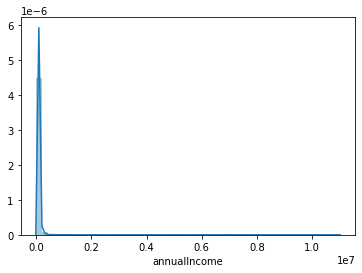

In [97]:
sns.distplot(data.annualIncome)
plt.show()     

####  revolBal 信贷周转余额合计

In [11]:
import numpy as np
np.set_printoptions(suppress=True)

In [20]:
data.revolBal
   #这个应该是我没有用完的额度

0         24178.0
1         15096.0
2          4606.0
3          9948.0
4          2942.0
           ...   
799995     9933.0
799996    20472.0
799997     6381.0
799998    69702.0
799999     8420.0
Name: revolBal, Length: 800000, dtype: float64

In [23]:
data.revolBal.max()
data.revolBal.mean()
data.revolBal.min()

0.0

In [30]:
data.loc[data.revolBal<50000].shape[0]

772188

In [31]:
#revolUtil 循环额度利用率
   # 我的额度是2万，但是我反复借8万，利用率就是4
data.revolUtil

0         48.9
1         38.9
2         51.8
3         52.6
4         32.0
          ... 
799995    46.4
799996    98.4
799997    51.9
799998    61.3
799999    72.6
Name: revolUtil, Length: 800000, dtype: float64

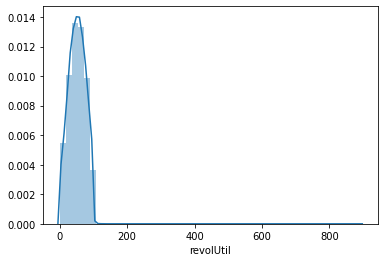

In [32]:
sns.distplot(data.revolUtil)
plt.show()

In [33]:
data.revolUtil.max()

892.3

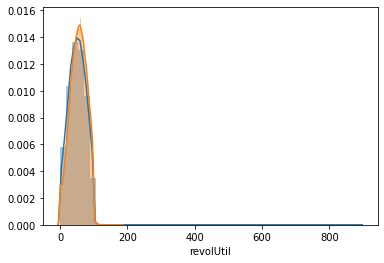

In [34]:
sns.distplot(data.loc[data.isDefault==0].revolUtil)
sns.distplot(data.loc[data.isDefault==1].revolUtil)
plt.show()

大致相似，想法是说 会不会说爱逾期的人，想要

#### 匿名特征

In [5]:
data.n0

0         0.0
1         NaN
2         0.0
3         6.0
4         1.0
         ... 
799995    0.0
799996    0.0
799997    2.0
799998    0.0
799999    2.0
Name: n0, Length: 800000, dtype: float64

In [8]:
data.n0.isnull().sum()

40270

In [9]:
data.n1.isnull().sum()

40270

In [18]:
((data.n0.isnull())&(data.n1.isnull() ) &(data.n2.isnull() ) &(data.n3.isnull() )).sum()

40270

就是40270 数据是没有行为数据的

In [21]:
n0na=data.n0.dropna()

In [22]:
nona

NameError: name 'nona' is not defined